<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: AMES Housing Dataset

--- 
# Notebook 3

The third notebook will comprise of scaling, model selection and evaluation.

---

# 1.0 Data and libraries Import

In [1]:
# Import libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
# Load data in dataframe
X = pd.read_csv('datasets/train_v3_preprocessed.csv')

## 1.1 Function
Create a function to report:
* mean absolute error (mae) - calculates the mean absolute difference between actual and predicted values
* median absolute deviation (mad) - calculates the median absolute difference between actual and predicted values
* mean absolute percentage error (mape) - calculates the mean absolute percentage difference between actual & predicted values
* median absolute percentage deviation (mapd) - calculates the median absolute percentage difference between actual & predicted values
* root mean square error (rmse) - the root squared difference between actual and predicted value

In [3]:
# Create a function to report errors
def report_error(model, X, y, metric='mae'):
    """
    Reports the errors from model prediction.
    :param model: trained ml model
    :param X: dataset of features
    :param y: array of actual outcome values
    :param metric: mae - mean absolute, mad - median absolute, 
                    rmse - root mean squared, or mape - mean absolute %
                    mapd - median absolute %
    :return: error value
    """

    predicted = model.predict(X)
    if metric == 'mae':
        errors = abs(predicted - y)
        print(f'The mean absolute error is {np.mean(errors):0.2f}.')
        # return np.mean(errors)
    elif metric == 'mad':
        errors = abs(predicted - y)
        print(f'The median absolute devation is {np.median(errors):0.2f}.')
        # return np.median(errors)
    elif metric == 'mape':
        errors = abs((predicted - y)/y) * 100
        print(f'The mean absoute percentage error is {np.mean(errors):0.2f}%.')
        # return np.mean(errors)
    elif metric == 'mapd':
        errors = abs((predicted - y)/y) * 100
        print(f'The median absoute percentage deviation is {np.median(errors):0.2f}%.')
        # return np.median(errors)
    else:
        #errors = mean_squared_error(y, predicted, squared=False)
        errors = np.sqrt((predicted - y) ** 2) 
        print(f'The root mean squared error is {np.mean(errors):0.2f}.')
        # return np.mean(errors)

# 2.0 Data Scaling

## 2.1 Scaling for Target Variable(y)

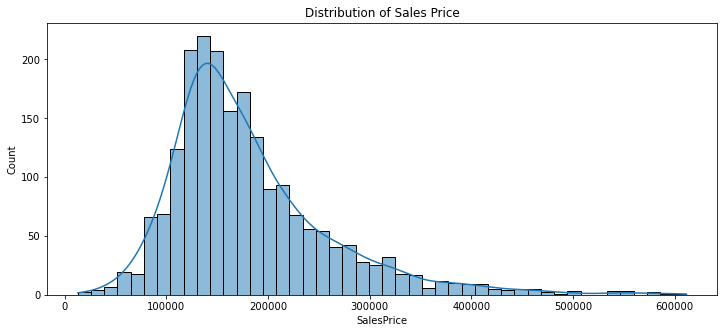

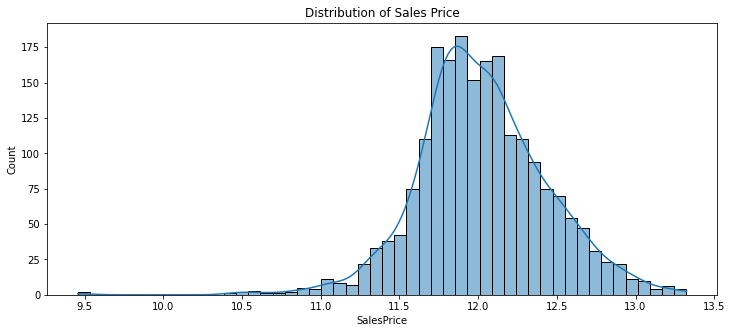

In [4]:
# Set graph parameters
plt.figure(figsize = (12, 5))
plt.title('Distribution of Sales Price')
plt.xlabel('SalesPrice')
plt.ylabel('Count')

# Plot histogram
sns.histplot(data=X, x="SalePrice", kde=True);

z = X.copy()
z['SalePrice'] = np.log(z['SalePrice'])

# Set graph parameters
plt.figure(figsize = (12, 5))
plt.title('Distribution of Sales Price')
plt.xlabel('SalesPrice')
plt.ylabel('Count')

# Plot histogram
sns.histplot(data=z, x="SalePrice", kde=True);

As observe above, the y variable is initially skewed to the right but after log transformation, most distance is about 1 unit away from the mean which makes log transformation a good method of scaling for our target variable.

## 2.2 Scaling for Features(X)

Before scaling, we will examine 3 types of scaling below.

<u>Min Max Scalar</u>
* Method: transform each feature to a value between 0 and 1
* Formula: y = x - x(min) / x(max) - x(min)
* Advantage: Preserves the shape of the original distribution
* Disadvantage: Does not meaningfully change the data

<u>Standard Scalar</u>
* Method: transform data to a distribution with mean 0 and sd 1
* Formula: y = x - x(mean) / x(sd)
* Advantage: Appliable to most data since most data are normally distributed in huge quantities
* Disadvantage: Affected by outliers. Scaled data will have negative values

<u>Robust Scalar</u>
* Method: Scale using the upper and lower percentile
* Formula: y = x - x(25th percentile) / x(75th percentile) - x(25th percentile)
* Advantage: Robust to Outliers
* Disadvantage: Does not take median into account and only focuses on the parts where the bulk data is

We will test all 3 scaling methods below using linear regression.

# 3.0 Train Test Split
We have 2051 rows of data. With less testing data, the performance statistic will have greater variance. Since the data is consider to be sufficiently large, e will start with 10% training data.

In [5]:
# Obtain target variable
y = X.pop('SalePrice')

In [6]:
features_keep = list(abs(X.corrwith(y)).sort_values(ascending=False)[30:].index)

X = X[features_keep]

In [7]:
# Applying Log Transform to the target variable now will cause the evaluation metrics to have small differences
# Thus log transformation of target variable will be chosen after model selection if necessary.

#y = np.log(y)

In [8]:
# Spliting test data using 10%, 20% and 30%

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 10% training data causes underfitting as the test errors are smaller than the train ones

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 20% training data returns difference in rmse score of 1854

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 30% training data returns the same difference as 20% trained data thus 20% trained data is sufficient.


# 4.0 Model Selection

## 4.1 Linear Regression
The linear regression model attempt to find linear relationships between x(features) and y(output).
Linear regression will plot a straight line that best fits the data points where the gradient is the weights assigned to each feature.

In [9]:
# Instantiate the model
lm = LinearRegression(n_jobs = -1)

In [10]:
# Using Standard Scaler
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

lm.fit(X_train_sc, y_train)

report_error(lm, X_test_sc, y_test, 'mae')
report_error(lm, X_test_sc, y_test, 'mad')
report_error(lm, X_test_sc, y_test, 'mape')
report_error(lm, X_test_sc, y_test, 'mapd')
report_error(lm, X_test_sc, y_test, 'rmse')
report_error(lm, X_train_sc, y_train, 'rmse')

print(cross_val_score(lm, X_test_sc, y_test, cv=5).mean())
print(cross_val_score(lm, X_test_sc, y_test, cv=6).mean())
print(cross_val_score(lm, X_test_sc, y_test, cv=7).mean())
print(cross_val_score(lm, X_test_sc, y_test, cv=8).mean())
print(cross_val_score(lm, X_test_sc, y_test, cv=9).mean())
print(cross_val_score(lm, X_test_sc, y_test, cv=10).mean())

lm_coef = list(zip(X_train.columns, lm.coef_))

lm_coef.sort(key=lambda x: x[1], reverse=True)

i = 1
for feature, coef in lm_coef[:10]:
    if coef >= 0.01:
        print(f'No.{i} feature: {feature} with coefficient {coef:0.2f}.')
        i += 1

The mean absolute error is 27354.60.
The median absolute devation is 19893.48.
The mean absoute percentage error is 16.49%.
The median absoute percentage deviation is 12.11%.
The root mean squared error is 27354.60.
The root mean squared error is 25519.62.
-1.2339927106072977e+25
-2.993690185747114e+23
-1.7940871549934737e+23
-3.417875268288217e+23
-8.132184602279562e+23
-4.8939103934101216e+23
No.1 feature: Land Contour_Lvl with coefficient 80636835957113008.00.
No.2 feature: Land Contour_HLS with coefficient 53387252433299800.00.
No.3 feature: Land Contour_Bnk with coefficient 51498315811880152.00.
No.4 feature: Land Contour_Low with coefficient 38432308617633384.00.
No.5 feature: House Style_1Story with coefficient 19711792032593116.00.
No.6 feature: House Style_2Story with coefficient 17971358130903886.00.
No.7 feature: Lot Config_Inside with coefficient 17817001051117330.00.
No.8 feature: Lot Config_Corner with coefficient 15176450747474020.00.
No.9 feature: House Style_1.5Fin wit

In [11]:
# Using Robust Scaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

lm.fit(X_train_rs, y_train)

report_error(lm, X_test_rs, y_test, 'mae')
report_error(lm, X_test_rs, y_test, 'mad')
report_error(lm, X_test_rs, y_test, 'mape')
report_error(lm, X_test_rs, y_test, 'mapd')
report_error(lm, X_test_rs, y_test, 'rmse')
report_error(lm, X_train_rs, y_train, 'rmse')

print(cross_val_score(lm, X_test_rs, y_test, cv=5).mean())
print(cross_val_score(lm, X_test_rs, y_test, cv=6).mean())
print(cross_val_score(lm, X_test_rs, y_test, cv=7).mean())
print(cross_val_score(lm, X_test_rs, y_test, cv=8).mean())
print(cross_val_score(lm, X_test_rs, y_test, cv=9).mean())
print(cross_val_score(lm, X_test_rs, y_test, cv=10).mean())

lm_coef = list(zip(X_train.columns, lm.coef_))

lm_coef.sort(key=lambda x: x[1], reverse=True)

i = 1
for feature, coef in lm_coef[:10]:
    if coef >= 0.01:
        print(f'No.{i} feature: {feature} with coefficient {coef:0.2f}.')
        i += 1

The mean absolute error is 27353.98.
The median absolute devation is 19781.46.
The mean absoute percentage error is 16.49%.
The median absoute percentage deviation is 12.05%.
The root mean squared error is 27353.98.
The root mean squared error is 25518.08.
0.4948565041337334
0.5375487796501963
0.5339814169681504
0.5307616816081323
0.5624387975936993
0.48181962709156656
No.1 feature: MS Zoning_RH with coefficient 71409.75.
No.2 feature: MS Zoning_RM with coefficient 57206.05.
No.3 feature: MS Zoning_RL with coefficient 55130.07.
No.4 feature: Condition 2_PosA with coefficient 54795.43.
No.5 feature: MS Zoning_FV with coefficient 38416.07.
No.6 feature: House Style_2.5Fin with coefficient 37250.76.
No.7 feature: Condition 1_PosN with coefficient 35205.42.
No.8 feature: 2nd Flr SF with coefficient 31183.80.
No.9 feature: Mas Vnr Type_Stone with coefficient 29658.62.
No.10 feature: MS Zoning_C (all) with coefficient 29534.25.


In [12]:
# Using Min Max Scaler
nm = MinMaxScaler()
X_train_nm = nm.fit_transform(X_train)
X_test_nm = nm.transform(X_test)

lm.fit(X_train_nm, y_train)

report_error(lm, X_test_nm, y_test, 'mae')
report_error(lm, X_test_nm, y_test, 'mad')
report_error(lm, X_test_nm, y_test, 'mape')
report_error(lm, X_test_nm, y_test, 'mapd')
report_error(lm, X_test_nm, y_test, 'rmse')
report_error(lm, X_train_nm, y_train, 'rmse')

print(cross_val_score(lm, X_test_nm, y_test, cv=5).mean())
print(cross_val_score(lm, X_test_nm, y_test, cv=6).mean())
print(cross_val_score(lm, X_test_nm, y_test, cv=7).mean())
print(cross_val_score(lm, X_test_nm, y_test, cv=8).mean())
print(cross_val_score(lm, X_test_nm, y_test, cv=9).mean())
print(cross_val_score(lm, X_test_nm, y_test, cv=10).mean())

lm_coef = list(zip(X_train.columns, lm.coef_))

lm_coef.sort(key=lambda x: x[1], reverse=True)

i = 1
for feature, coef in lm_coef[:10]:
    if coef >= 0.01:
        print(f'No.{i} feature: {feature} with coefficient {coef:0.2f}.')
        i += 1

The mean absolute error is 27353.21.
The median absolute devation is 19772.00.
The mean absoute percentage error is 16.49%.
The median absoute percentage deviation is 12.05%.
The root mean squared error is 27353.21.
The root mean squared error is 25517.98.
-1.215380972493299e+23
-4.8397809177948634e+22
-4.917376002558391e+23
-3.683269538716285e+23
-4.470756675866867e+23
-3.38480969328521e+23
No.1 feature: House Style_2.5Fin with coefficient 19708304205475160.00.
No.2 feature: House Style_SFoyer with coefficient 19708304205448884.00.
No.3 feature: House Style_1.5Unf with coefficient 19708304205443564.00.
No.4 feature: House Style_1Story with coefficient 19708304205438872.00.
No.5 feature: House Style_SLvl with coefficient 19708304205430824.00.
No.6 feature: House Style_2.5Unf with coefficient 19708304205428504.00.
No.7 feature: House Style_1.5Fin with coefficient 19708304205423128.00.
No.8 feature: House Style_2Story with coefficient 19708304205414284.00.
No.9 feature: Lot Config_CulDSa

### Choice of Scaling
Comparing the 3 types of scaling above, all 5 types of error reporting returns about the same value, robust scaler returns the most stable and the lowest absolute cross validation scores. Observing the top 10 features, standard scalar observe a drastic drop in weights from 4th to 5th feature, this is likely due to the fact that standard scalar scalar creates negative values when scaling. The weights of Min Max Scalar error are extremely high, this is likely due to a lot of zombified variables which were scaled further by Min Max Scalar. Moving forward, only robust scalar will be deployed

## 4.2 Lasso(Least Absolute Shrinkage & Selection Operator) Regression
The lasso regression model is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point. Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients. The lasso procedure encourages simple models with fewer parameters.  Lasso regression is suitable for models showing high levels of muticollinearity.

In [13]:
# Using Robust Scaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

# Set up a list of Lasso alphas to check.
# np.logspace generates 100 values equally between -3 and 0,
# then converts them to alphas between 10^-3 and 1 (that is, in logscale).
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000).fit(X_train, y_train);

In [14]:
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

lasso_cv.alpha_

0.794424170818087
0.7428335995727546


1.0

In [15]:
# Instantiate Lasso
ls = Lasso(alpha = 1.0)

In [16]:
# Using Robust Scaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

ls.fit(X_train_rs, y_train)

report_error(ls, X_test_rs, y_test, 'mae')
report_error(ls, X_test_rs, y_test, 'mad')
report_error(ls, X_test_rs, y_test, 'mape')
report_error(ls, X_test_rs, y_test, 'mapd')
report_error(ls, X_test_rs, y_test, 'rmse')
report_error(ls, X_train_rs, y_train, 'rmse')

ls_coef = list(zip(X_train.columns, ls.coef_))

ls_coef.sort(key=lambda x: x[1], reverse=True)

i = 1
for feature, coef in ls_coef[:10]:
    #if coef >= 0.01:
        print(f'No.{i} feature: {feature} with coefficient {coef:0.2f}.')
        i += 1

The mean absolute error is 27339.08.
The median absolute devation is 19793.23.
The mean absoute percentage error is 16.45%.
The median absoute percentage deviation is 12.05%.
The root mean squared error is 27339.08.
The root mean squared error is 25522.94.
No.1 feature: MS Zoning_RH with coefficient 65171.12.
No.2 feature: Condition 2_PosA with coefficient 54149.85.
No.3 feature: MS Zoning_RM with coefficient 51019.72.
No.4 feature: MS Zoning_RL with coefficient 49129.02.
No.5 feature: House Style_2.5Fin with coefficient 43774.49.
No.6 feature: Condition 1_PosN with coefficient 35132.03.
No.7 feature: Land Contour_HLS with coefficient 34094.42.
No.8 feature: MS Zoning_FV with coefficient 32229.15.
No.9 feature: 2nd Flr SF with coefficient 31149.33.
No.10 feature: Mas Vnr Type_Stone with coefficient 29809.41.


C:\Users\Bezalel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357502721637.4719, tolerance: 1043549734.1816766
  model = cd_fast.enet_coordinate_descent(


## 4.3 Ridge Regression
Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

In [17]:
# Using Robust Scaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5 (that is, in logscale).
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
# alphas: pass an Array of alpha values to try. It is still the Regularization strength
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5).fit(X_train_rs, y_train)# fitting 5-fold CV

In [18]:
print(ridge_cv.score(X_train_rs, y_train))
print(ridge_cv.score(X_test_rs, y_test))

ridge_cv.alpha_

0.7888241289290112
0.740838424266526


1.0

In [19]:
# Instantiate Ridge
rg = Ridge(alpha = 23.1)

In [28]:
# Using Robust Scaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

rg.fit(X_train_rs, y_train)

report_error(rg, X_test_rs, y_test, 'mae')
report_error(rg, X_test_rs, y_test, 'mad')
report_error(rg, X_test_rs, y_test, 'mape')
report_error(rg, X_test_rs, y_test, 'mapd')
report_error(rg, X_test_rs, y_test, 'rmse')
report_error(rg, X_train_rs, y_train, 'rmse')

rg_coef = list(zip(X_train.columns, rg.coef_))

rg_coef.sort(key=lambda x: x[1], reverse=True)

i = 1
for feature, coef in rg_coef:
    if abs(coef) >= 0.01:
        print(f'No.{i} feature: {feature} with coefficient {coef:0.2f}.')
        i += 1

The mean absolute error is 30747.55.
The median absolute devation is 23454.15.
The mean absoute percentage error is 18.81%.
The median absoute percentage deviation is 13.55%.
The root mean squared error is 30747.55.
The root mean squared error is 29285.37.
No.1 feature: Mas Vnr Type_Stone with coefficient 41790.19.
No.2 feature: Neighborhood_StoneBr with coefficient 34822.24.
No.3 feature: 2nd Flr SF with coefficient 30902.68.
No.4 feature: Neighborhood_NoRidge with coefficient 29220.86.
No.5 feature: Land Contour_HLS with coefficient 21231.67.
No.6 feature: Mas Vnr Type_BrkFace with coefficient 21097.49.
No.7 feature: Roof Style_Hip with coefficient 20850.86.
No.8 feature: Condition 1_PosN with coefficient 17392.92.
No.9 feature: Exterior 1st_CemntBd with coefficient 13665.66.
No.10 feature: Exterior 1st_BrkFace with coefficient 12499.56.
No.11 feature: Paved Drive with coefficient 11723.04.
No.12 feature: MS Zoning_RL with coefficient 11688.90.
No.13 feature: Wood Deck SF with coeffi

## 4.4 Comparing the 3 models

Comparing outputs for robust scaling only.
Summarizing results from above.

|No|Model|MAE|MAD|MAPE|MAPD|RMSE(Test)|RMSE(Train)|
|:---|:---|:---|:---|:---|:---|:---|:---|
|1.|Linear Regression|19012.66|13509.30|12.72%|7.66%|19012.66|16575.59|
|2.|Lasso Regression|18885.66|13184.29|12.60%|7.58%|18885.66|16577.62|
|3.|Ridge Regression|18068.72|12861.74|11.89%|7.80%|18068.72|16842.88|

All 3 models do not show overfitting as RMSE(Train) is lower than RMSE(Test)


<u>Linear Regression</u> 
Linear Regression yield the poorest score for all the evaluation metrics. This is due to no penalty values will assign to features unlike the other 2 models who also attempts to draw a line of best fit through the data points.

<u>Lasso Regression</u>
Although Lasso Regression scored best for MAPD but better than Ridge for MAD. This means that  while the actual deviation of the errors are low but for the deviation values for this model are wider apart thus resulting in a lower %. Having the best RMSE(Train) but not the best RMSE(Test) indicates there is a bit of overfitting. This is probably due to the large number of features.


<u>Ridge Regression</u>
Ridge Regression scored the best for MAE, MAPE, MAD and RMSE(Test). Scoring high in MAE and MAPE indicates the errors are closest to the mean as compared to the other models. Having the best MAD score means the errors do not deviate much from the median. Best RMSE(Test) shows the model has the best performance among the 3 models. Ridge also works best in our model as it works well against multicollinearity which exist in our data due to many zombified variables created.

We will use Ridge Regression from now on.

## 5.0 Feature Selection to remove noisy or multi-collinear features
Removing features whose weights are lower than 100 as these weights are insignificant as compare to the top ones to see if the rmse score can be improve. This will be done over the next 3 cells.

In [21]:
rg_coef = list(zip(X_train.columns, rg.coef_))

rg_coef.sort(key=lambda x: x[1], reverse=True)

i = 1
for feature, coef in rg_coef:
    if abs(coef) < 100:
        print(f'No.{i} feature: {feature} with coefficient {coef:0.2f}.')
        i += 1

No.1 feature: Low Qual Fin SF with coefficient 42.95.
No.2 feature: Enclosed Porch with coefficient 9.60.
No.3 feature: BsmtFin SF 2 with coefficient 0.40.
No.4 feature: Misc Val with coefficient -9.04.
No.5 feature: Pool Area with coefficient -68.67.


In [22]:
# Remove features with small weights as shown above.
X.drop(columns = ['Screen Porch', 'Roof Matl_Tar&Grv', '3Ssn Porch', 
                  'Neighborhood_Veenker', 'Low Qual Fin SF', 'Enclosed Porch', 'Lot Config_Inside',
                  'BsmtFin SF 2', 'Misc Val', 'Pool Area'], inplace = True)

In [23]:
# Repeat train test split and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Robust Scaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

rg.fit(X_train_rs, y_train)

report_error(rg, X_test_rs, y_test, 'mae')
report_error(rg, X_test_rs, y_test, 'mad')
report_error(rg, X_test_rs, y_test, 'mape')
report_error(rg, X_test_rs, y_test, 'mapd')
report_error(rg, X_test_rs, y_test, 'rmse')
report_error(rg, X_train_rs, y_train, 'rmse')

The mean absolute error is 30747.55.
The median absolute devation is 23454.15.
The mean absoute percentage error is 18.81%.
The median absoute percentage deviation is 13.55%.
The root mean squared error is 30747.55.
The root mean squared error is 29285.37.


Removing the 10 features with lowest score did not improve the RMSE but worsen it thus all variables will be kept.